## Lab 3 z Podstaw Uczenia Maszynowego - Klasyfikacja Logistyczna
### Autor: Dominik Pabiniak
### Nr indeksu: 254397

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time
from collections import defaultdict 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
def sensitivity(m_p):
    return round((m_p[0][0]/(m_p[0][0] + m_p[0][1])), 4)
def specificity(m_p):
    return round((m_p[1][1]/(m_p[1][0] + m_p[1][1])), 4)

def plot_class(X_syn_test, X_pred_0, X_pred_1, model, method):
        x_min, x_max = X_syn_test[:, 0].min() - 0.2, X_syn_test[:, 0].max() + 0.2
        y_min, y_max = X_syn_test[:, 1].min() - 0.2, X_syn_test[:, 1].max() + 0.2
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.2)
        plt.scatter(X_pred_0[:, 0], X_pred_0[:, 1], marker='.', label='Klasa 1')
        plt.scatter(X_pred_1[:, 0], X_pred_1[:, 1], marker='.', label='Klasa 2')
        plt.title(f'Powierzchnia decyzyjna {method}')
        plt.xlabel('Cecha 1')
        plt.ylabel('Cecha 2')
        plt.legend()


def plot_class_poly(X_syn_test, X_pred_0, X_pred_1, model, method, poly):
    x_min, x_max = X_syn_test[:, 0].min() - 0.2, X_syn_test[:, 0].max() + 0.2
    y_min, y_max = X_syn_test[:, 1].min() - 0.2, X_syn_test[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
    Z1 = np.c_[xx.ravel(), yy.ravel()]
    ZP = poly.transform(Z1)
    Z = model.predict(ZP)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X_pred_0[:, 0], X_pred_0[:, 1], marker='.', label='Klasa 1')
    plt.scatter(X_pred_1[:, 0], X_pred_1[:, 1], marker='.', label='Klasa 2')
    plt.title(f'Powierzchnia decyzyjna {method}')
    plt.xlabel('Cecha 1')
    plt.ylabel('Cecha 2')
    plt.legend()

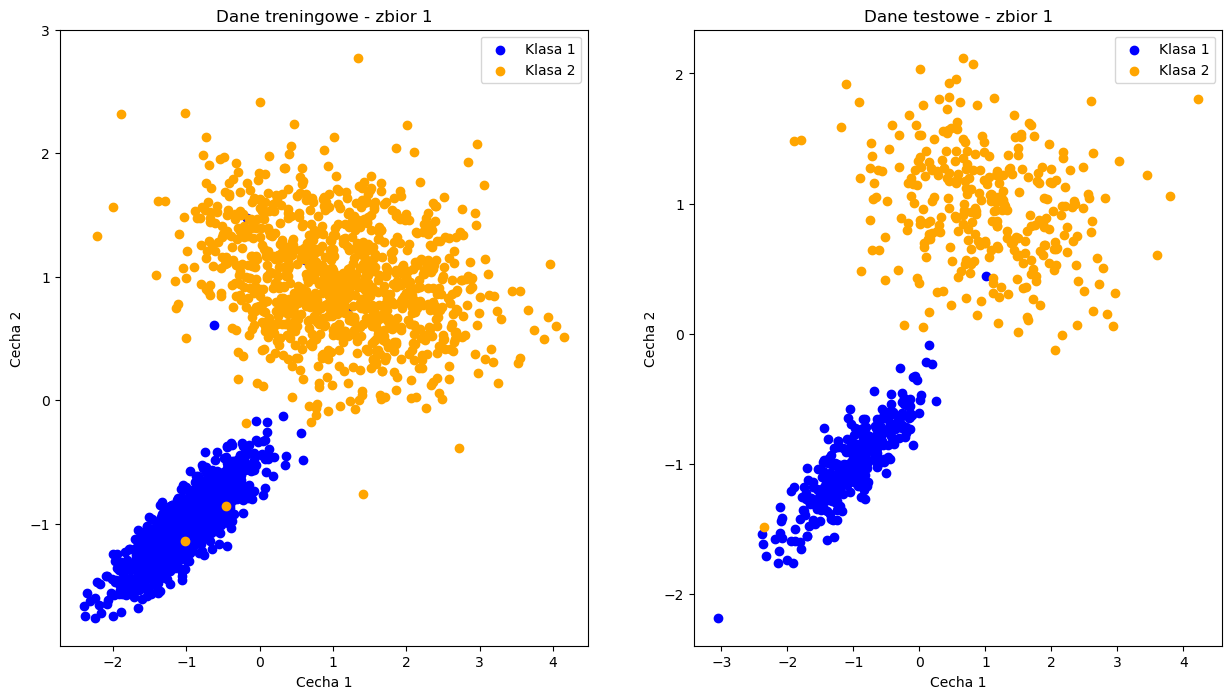

In [29]:
scaler = MinMaxScaler()
# Dane wejsciowe
X, t = make_classification(n_samples=2597, n_features=2, n_clusters_per_class=1, n_redundant=0, random_state=254397)

#Podzial na podzbiory
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X, t, test_size=0.25, random_state=254397)


# Podzial zbiorow na klasy w celu ich wyswietlenia
klasa_0_train = X_syn_train[(y_syn_train == 0)]
klasa_1_train = X_syn_train[(y_syn_train == 1)]
klasa_0_test = X_syn_test[(y_syn_test == 0)]
klasa_1_test = X_syn_test[(y_syn_test == 1)]

# Wyswietlenie danych
_, axs = plt.subplots(1, 2, figsize=(15, 8))
ax = axs[0]
ax.scatter(klasa_0_train[:,0], klasa_0_train[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_train[:,0], klasa_1_train[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane treningowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

ax = axs[1]
ax.scatter(klasa_0_test[:,0], klasa_0_test[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_test[:,0], klasa_1_test[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane testowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

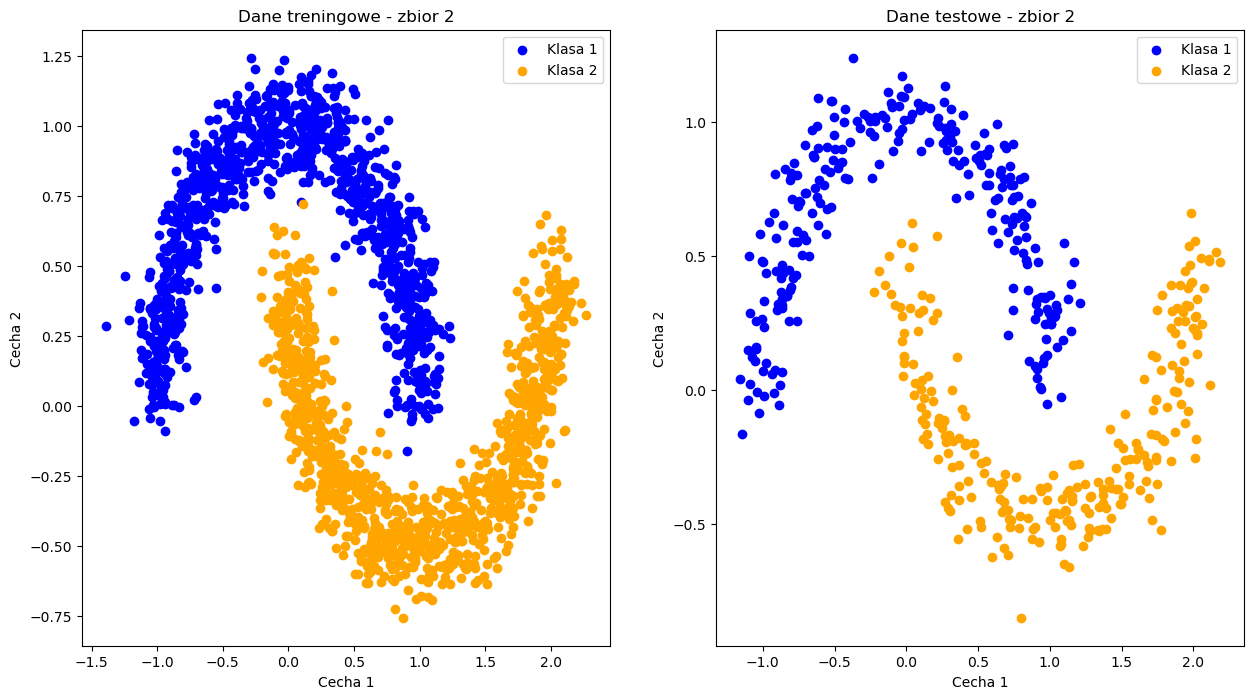

In [30]:
# Dane wejsciowe
X_m, t_m = make_moons(n_samples=2597, random_state=254397, noise=0.1)

#Podzial na podzbiory
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_m, t_m, test_size=.2, random_state=254397)

# Podzial zbiorow na klasy w celu ich wyswietlenia
klasa_0_train_M = X_train_M[(y_train_M == 0)]
klasa_1_train_M = X_train_M[(y_train_M == 1)]
klasa_0_test_M = X_test_M[(y_test_M == 0)]
klasa_1_test_M = X_test_M[(y_test_M == 1)]

# Wyswietlenie danych
_, axs = plt.subplots(1, 2, figsize=(15, 8))
ax = axs[0]
ax.scatter(klasa_0_train_M[:,0], klasa_0_train_M[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_train_M[:,0], klasa_1_train_M[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane treningowe - zbior 2")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

ax = axs[1]
ax.scatter(klasa_0_test_M[:,0], klasa_0_test_M[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_test_M[:,0], klasa_1_test_M[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane testowe - zbior 2")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

In [31]:
class MLogisticRegression:
    def __init__(self, eta, num_iterations):
        self.eta = eta
        self.num_iterations = num_iterations
        self.theta = None
        self.y_pred_prob = None
        self.EPSILON = 0.001
        

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def fit(self, X, y):
        _, num_features = X.shape
        self.theta = np.zeros(num_features)
        

        for i in range(self.num_iterations):
            linear_model = X @ self.theta
            y_predicted = self.sigmoid(linear_model)

            epsilon = (y_predicted - y)
            dw = epsilon @ X
            self.theta -= self.eta * dw
            if abs(statistics.mean(epsilon)) < self.EPSILON:
                break
            

    def predict(self, X):
        linear_model = X @ self.theta
        y_predicted_prob = self.sigmoid(linear_model)
        self.y_pred_prob = y_predicted_prob
        y_predicted = [1 if i > 0.5 else 0 for i in y_predicted_prob]
        return np.array(y_predicted)
    
    def decision_function(self, X):
        linear_model = X @ self.theta
        y_predicted_prob = self.sigmoid(linear_model)
        return np.array(y_predicted_prob)

    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

Sredni czas metody numerycznej: 0.022918658256530763 s
(650,)
Macierz pomylek: 
[[333   2]
 [  3 312]]
Dokladnosc: 0.9923076923076923
Czulosc: 0.994
Swoistosc: 0.9905
Sredni czas metody sklearn: 0.002910003662109375 s

Sklearn
Macierz pomylek: 
[[333   2]
 [  3 312]]
Dokladnosc: 0.9953846153846154
Czulosc: 0.997
Swoistosc: 0.9937


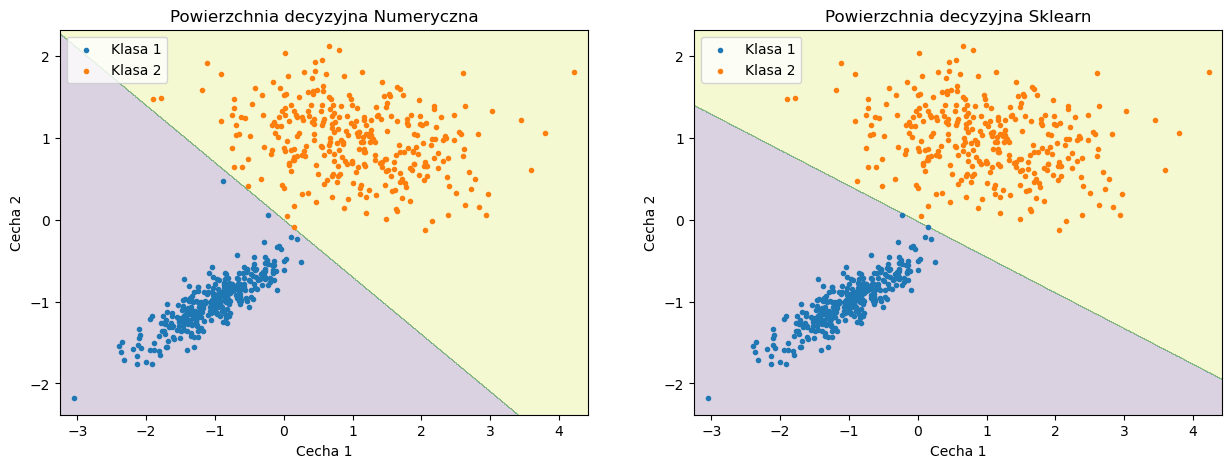

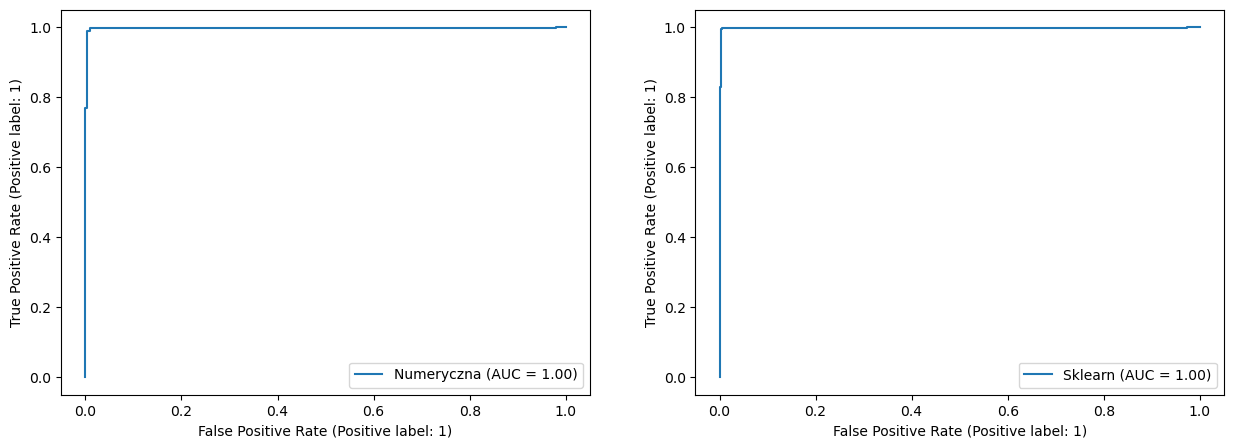

In [32]:
model = MLogisticRegression(eta=0.01, num_iterations=100)
start = time.time()
for i in range(100):
    model.fit(X_syn_train, y_syn_train)
    y_pred = model.predict(X_syn_test)
end = time.time()
print(f'Sredni czas metody numerycznej: {(end - start)/100} s')
print(y_pred.shape)

accuracy = accuracy_score(y_syn_test, y_pred)
c_matrix = confusion_matrix(y_syn_test, y_pred)
print(f'Macierz pomylek: \n{c_matrix}')
print(f'Dokladnosc: {accuracy}\nCzulosc: {sensitivity(c_matrix)}\nSwoistosc: {specificity(c_matrix)}')
X_pred_0 = X_syn_test[y_pred == 0]
X_pred_1 = X_syn_test[y_pred == 1]


model_sk = LogisticRegression()
start = time.time()
for i in range(100):
    model_sk.fit(X_syn_train, y_syn_train)
    y_pred_sk = model_sk.predict(X_syn_test)
end = time.time()
print(f'Sredni czas metody sklearn: {(end - start)/100} s')

accuracy_sk = accuracy_score(y_syn_test, y_pred_sk)
c_matrix_sk = confusion_matrix(y_syn_test, y_pred_sk)
print(f'\nSklearn\nMacierz pomylek: \n{c_matrix}')
print(f'Dokladnosc: {accuracy_sk}\nCzulosc: {sensitivity(c_matrix_sk)}\nSwoistosc: {specificity(c_matrix_sk)}')
X_pred_0_sk = X_syn_test[y_pred_sk == 0]
X_pred_1_sk = X_syn_test[y_pred_sk == 1]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_class(X_syn_test, X_pred_0, X_pred_1, model, 'Numeryczna')
plt.subplot(1, 2, 2)
plot_class(X_syn_test, X_pred_0_sk, X_pred_1_sk, model_sk, 'Sklearn')


y_scores_sk = model_sk.decision_function(X_syn_test)
y_scores = model.decision_function(X_syn_test)

_, axs = plt.subplots(1, 2, figsize=(15, 5))
RocCurveDisplay.from_predictions(y_syn_test, y_scores, name='Numeryczna', ax=axs[0])
RocCurveDisplay.from_predictions(y_syn_test, y_scores_sk, name='Sklearn', ax=axs[1])

Sredni czas metody numerycznej: 0.06626465320587158 s
Macierz pomylek: 
[[264   0]
 [  2 254]]
Dokladnosc: 0.9961538461538462
Czulosc: 1.0
Swoistosc: 0.9922
Sredni czas metody sklearn: 0.009801785945892334 s
Macierz pomylek: 
[[264   0]
 [  2 254]]
Dokladnosc: 0.9961538461538462
Czulosc: 1.0
Swoistosc: 0.9922


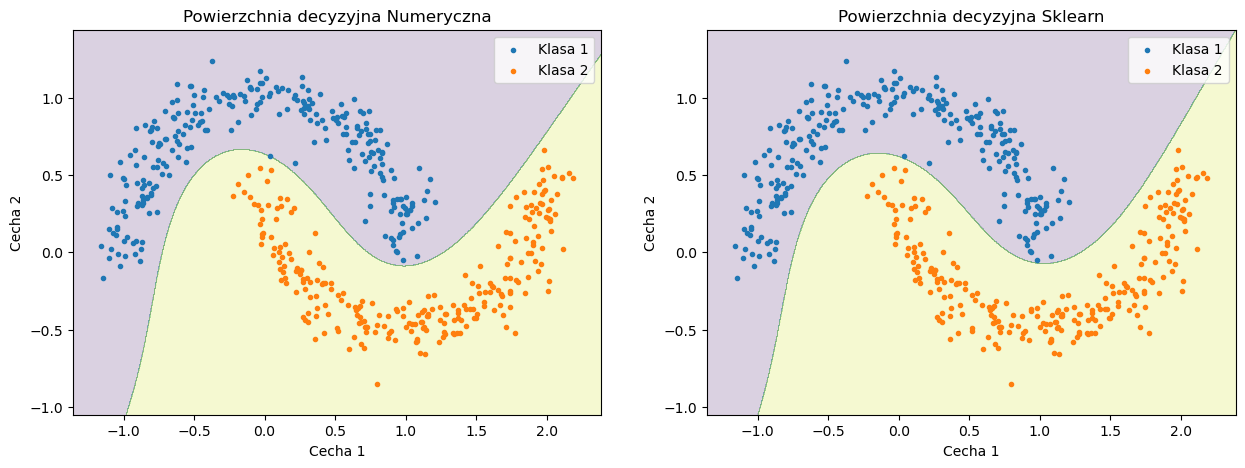

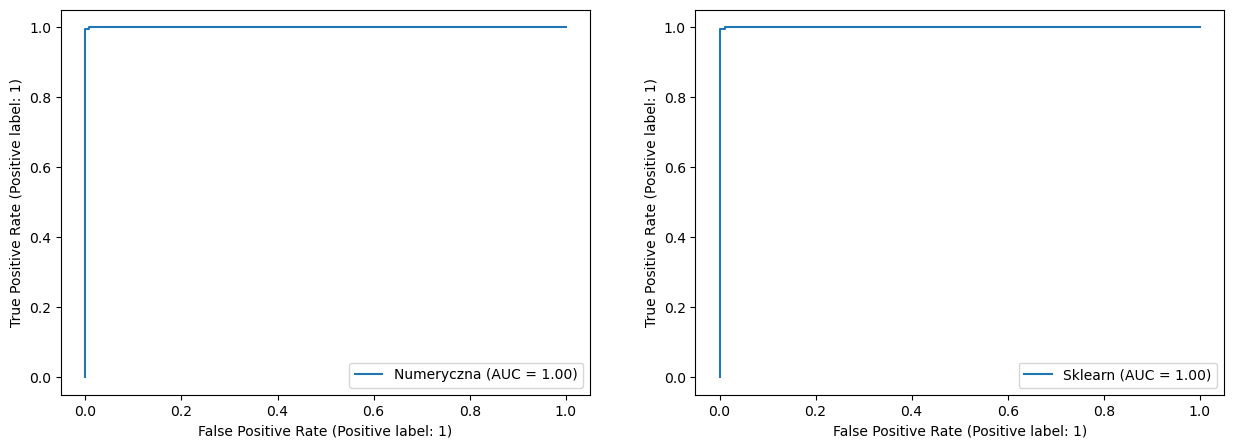

In [33]:
model_m = MLogisticRegression(eta=0.01, num_iterations=100)
poly_3 = PolynomialFeatures(3)

XP_train_M = poly_3.fit_transform(X_train_M)
XP_test_M = poly_3.transform(X_test_M)

start = time.time()
for i in range(100):
    model_m.fit(XP_train_M, y_train_M)
    y_pred_m = model_m.predict(XP_test_M)
end = time.time()
print(f'Sredni czas metody numerycznej: {(end - start)/100} s')

accuracy_m = accuracy_score(y_test_M, y_pred_m)
c_matrix_m = confusion_matrix(y_test_M, y_pred_m)
print(f'Macierz pomylek: \n{c_matrix_m}')
print(f'Dokladnosc: {accuracy_m}\nCzulosc: {sensitivity(c_matrix_m)}\nSwoistosc: {specificity(c_matrix_m)}')
X_pred_0_m = X_test_M[y_pred_m == 0]
X_pred_1_m = X_test_M[y_pred_m == 1]


model_m_sk = LogisticRegression()

start = time.time()
for i in range(100):
    model_m_sk.fit(XP_train_M, y_train_M)
    y_pred_m_sk= model_m_sk.predict(XP_test_M)
end = time.time()
print(f'Sredni czas metody sklearn: {(end - start)/100} s')

accuracy_m_sk = accuracy_score(y_test_M, y_pred_m_sk)
c_matrix_m_sk = confusion_matrix(y_test_M, y_pred_m_sk)
print(f'Macierz pomylek: \n{c_matrix_m_sk}')
print(f'Dokladnosc: {accuracy_m_sk}\nCzulosc: {sensitivity(c_matrix_m_sk)}\nSwoistosc: {specificity(c_matrix_m_sk)}')
X_pred_0_m_sk = X_test_M[y_pred_m_sk == 0]
X_pred_1_m_sk = X_test_M[y_pred_m_sk == 1]



plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_class_poly(X_test_M, X_pred_0_m, X_pred_1_m, model_m, 'Numeryczna', poly_3)
plt.subplot(1, 2, 2)
plot_class_poly(X_test_M, X_pred_0_m_sk, X_pred_1_m_sk, model_m_sk, 'Sklearn', poly_3)

y_scores_m = model_m.decision_function(XP_test_M)
y_scores_m_sk = model_m_sk.decision_function(XP_test_M)

_, axs = plt.subplots(1, 2, figsize=(15, 5))
RocCurveDisplay.from_predictions(y_test_M, y_scores_m, name='Numeryczna', ax=axs[0])
RocCurveDisplay.from_predictions(y_test_M, y_scores_m_sk, name='Sklearn', ax=axs[1])

In [34]:
australia_data = pd.read_csv('rainAUS.csv', parse_dates=['Date'])

# Usuwanie kolumn >30% missing
missing_percentage = australia_data.isna().mean()
columns_to_drop = missing_percentage[missing_percentage > 0.3].index
australia_data = australia_data.drop(columns=columns_to_drop)

print(missing_percentage)
print(f'Columns dropped: {columns_to_drop}\n\n')

# Imputacja MCAR oraz normalizacja OneHotEncoder dla kategorycznych
numeric_columns = australia_data.select_dtypes(include=['number']).columns

for col in numeric_columns:
    median_value = australia_data[col].median()
    australia_data[col].fillna(median_value, inplace=True)


categorical_columns = australia_data.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    if col != 'Location':
        dominant_value = australia_data[col].mode()[0]
        australia_data[col].fillna(dominant_value, inplace=True)
        if col != 'RainTomorrow' and col != 'RainToday':
            encoded_df = pd.get_dummies(australia_data[col], dtype=int)
            australia_data = pd.concat([australia_data, encoded_df], axis = 1)
            australia_data = australia_data.drop(columns=col)

# Winsoryzacja danych numerycznych oraz normalizacja MinMaxScaler
mms = MinMaxScaler()
for col in numeric_columns:
    Q1 = australia_data[col].quantile(0.25)
    Q3 = australia_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    australia_data[col] = australia_data[col].clip(lower=lower_bound, upper=upper_bound)
    normalized_values = mms.fit_transform(australia_data[[col]])
    australia_data[col] = normalized_values



# Zamiana daty na uzyteczniejsza forme oraz jej normalizacja
australia_data['Year'] = australia_data.Date.dt.year
normalized_values = mms.fit_transform(australia_data[['Year']])
australia_data['Year'] = normalized_values

australia_data['Day'] = australia_data.Date.dt.day_of_year
normalized_values = mms.fit_transform(australia_data[['Day']])
australia_data['Day'] = normalized_values

australia_data.drop(columns=['Date'], inplace=True)

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Podzial danych ze wzgledu na lokalizacje oraz zamiana wartosci z [No, Yes] na [0, 1]
australia_data['RainTomorrow'].replace({'Yes': 1, 'No': 0}, inplace=True)
australia_data['RainToday'].replace({'Yes': 1, 'No': 0}, inplace=True)

# Zebranie poszczegolnych danych z podzialem na lokalizacje oraz podzielenie ich na podzbiory treningowe oraz testowe
locations = australia_data['Location'].unique()
location_dict = defaultdict(list)

for location in locations:
    loc = australia_data[australia_data['Location'] == location]
    location_features = loc.drop(columns=['RainTomorrow', 'Location'])
    location_raint = loc['RainTomorrow']
    
    X_train, X_test, y_train, y_test = train_test_split(location_features, location_raint, test_size=0.2, random_state=254397, stratify=location_raint)
    location_dict[location].append([[X_train], [X_test], [y_train], [y_test]])

# Wyjasnienie pozyskiwania danych ze slownika
# location_dict[name][0][nr zbioru (X_train...)]

print(australia_data[:10])

# oddzielenie RainTomorrow od reszty cech dla wszystkich lokalizacji
australia_data.drop(columns=['Location'], inplace=True)
rain_tomorrow = australia_data['RainTomorrow']
rain_tomorrow = np.array(rain_tomorrow).reshape(-1, 1)

features = australia_data.iloc[:,:-1].values
features = np.array(features)

print(rain_tomorrow.shape, features.shape)


Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64
Columns dropped: Index(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], dtype='object')


  Location   MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0   Albury  0.531593  0.495098  0.400000       0.591667      0.540541   
1   Albury  0.366758  0.549020  0.000000       0.591667      0.108108   
2   Albury  0.517857  0.563725  0.000000       0.625000      0.513514   
3

In [35]:
list_of_models = []
for location in locations:
    X_train_loc = np.array(location_dict[location][0][0][0])

    X_test_loc = np.array(location_dict[location][0][1][0])

    y_train_loc = np.array(location_dict[location][0][2][0])

    y_test_loc = np.array(location_dict[location][0][3][0])

    
    model = LogisticRegression()
    model.fit(X_train_loc, y_train_loc)
    list_of_models.append(model)
    y_pred_loc = model.predict(X_test_loc)

    accuracy_loc = accuracy_score(y_test_loc, y_pred_loc)
    c_matrix_loc = confusion_matrix(y_test_loc, y_pred_loc)

    print(f'\n{location}:\nMacierz pomylek: \n{c_matrix_loc}')
    print(f'Dokladnosc: {accuracy_loc}\nCzulosc: {sensitivity(c_matrix_loc)}\nSwoistosc: {specificity(c_matrix_loc)}')
    # X_pred_0_loc = X_test_loc[y_pred_loc == 0]
    # X_pred_1_loc = X_test_loc[y_pred_loc == 1]  



Albury:
Macierz pomylek: 
[[460  24]
 [ 52  72]]
Dokladnosc: 0.875
Czulosc: 0.9504
Swoistosc: 0.5806

BadgerysCreek:
Macierz pomylek: 
[[466  19]
 [ 65  52]]
Dokladnosc: 0.8604651162790697
Czulosc: 0.9608
Swoistosc: 0.4444

Cobar:
Macierz pomylek: 
[[513  12]
 [ 43  34]]
Dokladnosc: 0.9086378737541528
Czulosc: 0.9771
Swoistosc: 0.4416

CoffsHarbour:
Macierz pomylek: 
[[392  36]
 [ 86  88]]
Dokladnosc: 0.7973421926910299
Czulosc: 0.9159
Swoistosc: 0.5057

Moree:
Macierz pomylek: 
[[508  15]
 [ 38  41]]
Dokladnosc: 0.9119601328903655
Czulosc: 0.9713
Swoistosc: 0.519

Newcastle:
Macierz pomylek: 
[[443  19]
 [109  37]]
Dokladnosc: 0.7894736842105263
Czulosc: 0.9589
Swoistosc: 0.2534

NorahHead:
Macierz pomylek: 
[[411  28]
 [ 80  82]]
Dokladnosc: 0.8202995008319468
Czulosc: 0.9362
Swoistosc: 0.5062

NorfolkIsland:
Macierz pomylek: 
[[381  37]
 [ 91  93]]
Dokladnosc: 0.7873754152823921
Czulosc: 0.9115
Swoistosc: 0.5054

Penrith:
Macierz pomylek: 
[[470  19]
 [ 59  60]]
Dokladnosc: 0.87171

c:\Users\Dominik\anaconda3\envs\amumu\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



WaggaWagga:
Macierz pomylek: 
[[478  17]
 [ 64  43]]
Dokladnosc: 0.8654485049833887
Czulosc: 0.9657
Swoistosc: 0.4019

Williamtown:
Macierz pomylek: 
[[436  26]
 [ 95  45]]
Dokladnosc: 0.7990033222591362
Czulosc: 0.9437
Swoistosc: 0.3214

Wollongong:
Macierz pomylek: 
[[442  23]
 [ 74  69]]
Dokladnosc: 0.8404605263157895
Czulosc: 0.9505
Swoistosc: 0.4825

Canberra:
Macierz pomylek: 
[[544  18]
 [ 68  58]]
Dokladnosc: 0.875
Czulosc: 0.968
Swoistosc: 0.4603

Tuggeranong:
Macierz pomylek: 
[[478  16]
 [ 63  51]]
Dokladnosc: 0.8700657894736842
Czulosc: 0.9676
Swoistosc: 0.4474

MountGinini:
Macierz pomylek: 
[[414  30]
 [ 81  83]]
Dokladnosc: 0.8174342105263158
Czulosc: 0.9324
Swoistosc: 0.5061

Ballarat:
Macierz pomylek: 
[[421  31]
 [ 69  87]]
Dokladnosc: 0.8355263157894737
Czulosc: 0.9314
Swoistosc: 0.5577

Bendigo:
Macierz pomylek: 
[[477  19]
 [ 57  55]]
Dokladnosc: 0.875
Czulosc: 0.9617
Swoistosc: 0.4911

Sale:
Macierz pomylek: 
[[447  26]
 [ 72  57]]
Dokladnosc: 0.8372093023255814


c:\Users\Dominik\anaconda3\envs\amumu\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Witchcliffe:
Macierz pomylek: 
[[390  36]
 [ 48 128]]
Dokladnosc: 0.8604651162790697
Czulosc: 0.9155
Swoistosc: 0.7273

PearceRAAF:
Macierz pomylek: 
[[475  26]
 [ 49  52]]
Dokladnosc: 0.8754152823920266
Czulosc: 0.9481
Swoistosc: 0.5149

PerthAirport:
Macierz pomylek: 
[[467  22]
 [ 42  71]]
Dokladnosc: 0.893687707641196
Czulosc: 0.955
Swoistosc: 0.6283

Perth:
Macierz pomylek: 
[[488  22]
 [ 36  93]]
Dokladnosc: 0.9092331768388107
Czulosc: 0.9569
Swoistosc: 0.7209

SalmonGums:
Macierz pomylek: 
[[498   8]
 [ 56  39]]
Dokladnosc: 0.8935108153078203
Czulosc: 0.9842
Swoistosc: 0.4105

Walpole:
Macierz pomylek: 
[[370  42]
 [ 82 108]]
Dokladnosc: 0.7940199335548173
Czulosc: 0.8981
Swoistosc: 0.5684

Hobart:
Macierz pomylek: 
[[460  27]
 [ 83  69]]
Dokladnosc: 0.8278560250391236
Czulosc: 0.9446
Swoistosc: 0.4539

Launceston:
Macierz pomylek: 
[[439  29]
 [ 75  65]]
Dokladnosc: 0.8289473684210527
Czulosc: 0.938
Swoistosc: 0.4643

AliceSprings:
Macierz pomylek: 
[[551   8]
 [ 32  17]]
Dokl

In [36]:
X_train_aus, X_test_aus, y_train_aus, y_test_aus = train_test_split(features, rain_tomorrow, test_size=0.2, random_state=254397)
for i in range(len(list_of_models)):
    y_pred_aus = list_of_models[i].predict(X_test_aus)
    accuracy_aus = accuracy_score(y_test_aus, y_pred_aus)
    c_matrix_aus = confusion_matrix(y_test_aus, y_pred_aus)
    print(f'\n{locations[i]}:\nMacierz pomylek: \n{c_matrix_aus}')
    print(f'Dokladnosc: {accuracy_aus}\nCzulosc: {sensitivity(c_matrix_aus)}\nSwoistosc: {specificity(c_matrix_aus)}')

#Sydney 0.84, 0,7, MelbourneAirport[21] 0.9047, 0.7808


Albury:
Macierz pomylek: 
[[18753  4062]
 [ 2856  3421]]
Dokladnosc: 0.7622026673999726
Czulosc: 0.822
Swoistosc: 0.545

BadgerysCreek:
Macierz pomylek: 
[[20661  2154]
 [ 3579  2698]]
Dokladnosc: 0.8029355149181906
Czulosc: 0.9056
Swoistosc: 0.4298

Cobar:
Macierz pomylek: 
[[20439  2376]
 [ 2715  3562]]
Dokladnosc: 0.8250034373710986
Czulosc: 0.8959
Swoistosc: 0.5675

CoffsHarbour:
Macierz pomylek: 
[[19871  2944]
 [ 2480  3797]]
Dokladnosc: 0.8135569916128145
Czulosc: 0.871
Swoistosc: 0.6049

Moree:
Macierz pomylek: 
[[21027  1788]
 [ 3115  3162]]
Dokladnosc: 0.8314656950364361
Czulosc: 0.9216
Swoistosc: 0.5037

Newcastle:
Macierz pomylek: 
[[21420  1395]
 [ 3952  2325]]
Dokladnosc: 0.816203767358724
Czulosc: 0.9389
Swoistosc: 0.3704

NorahHead:
Macierz pomylek: 
[[21390  1425]
 [ 3602  2675]]
Dokladnosc: 0.8272033548741922
Czulosc: 0.9375
Swoistosc: 0.4262

NorfolkIsland:
Macierz pomylek: 
[[20739  2076]
 [ 3647  2630]]
Dokladnosc: 0.803279252028049
Czulosc: 0.909
Swoistosc: 0.419


MelbourneAirport:
Macierz pomylek: 
[[20640  2175]
 [ 1376  4901]]
Dokladnosc: 0.8779389522892892
Czulosc: 0.9047
Swoistosc: 0.7808

Dummy:
Macierz pomylek: 
[[17780  5035]
 [ 4971  1306]]
Dokladnosc: 0.6560566478757046
Czulosc: 0.7793
Swoistosc: 0.2081

Numeryczna:
Macierz pomylek: 
[[13152  9663]
 [  549  5728]]
Dokladnosc: 0.648975663412622
Czulosc: 0.5765
Swoistosc: 0.9125


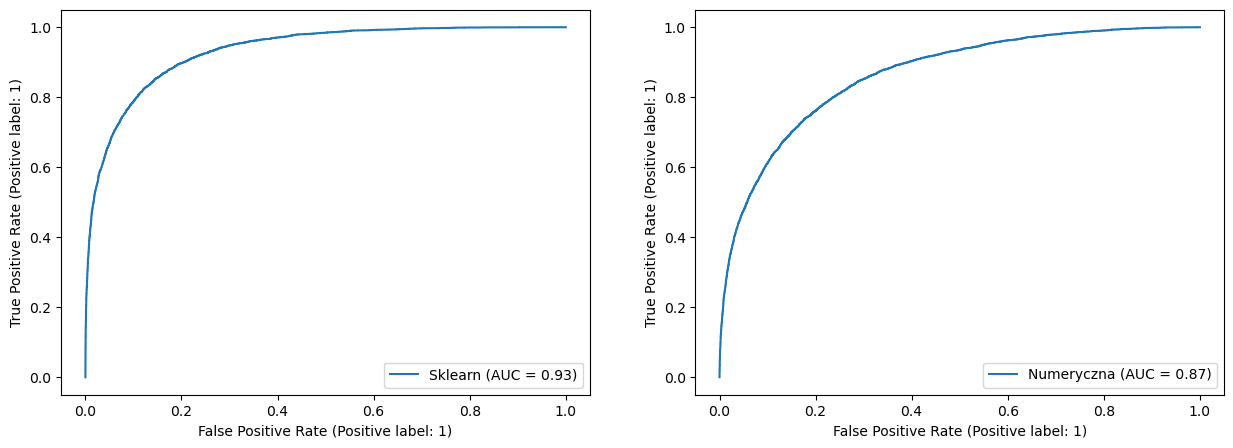

In [37]:
y_pred_aus = list_of_models[21].predict(X_test_aus)

accuracy_aus = accuracy_score(y_test_aus, y_pred_aus)
c_matrix_aus = confusion_matrix(y_test_aus, y_pred_aus)
print(f'\n{locations[21]}:\nMacierz pomylek: \n{c_matrix_aus}')
print(f'Dokladnosc: {accuracy_aus}\nCzulosc: {sensitivity(c_matrix_aus)}\nSwoistosc: {specificity(c_matrix_aus)}')


dummy_model = DummyClassifier(strategy='stratified', random_state=254397)
dummy_model.fit(X_train_aus, y_train_aus)
y_pred_dummy = dummy_model.predict(X_test_aus)

accuracy_dummy = accuracy_score(y_test_aus, y_pred_dummy)
c_matrix_dummy = confusion_matrix(y_test_aus, y_pred_dummy)
print(f'\nDummy:\nMacierz pomylek: \n{c_matrix_dummy}')
print(f'Dokladnosc: {accuracy_dummy}\nCzulosc: {sensitivity(c_matrix_dummy)}\nSwoistosc: {specificity(c_matrix_dummy)}')


model_21 = MLogisticRegression(eta=0.01, num_iterations=100)
model_21.fit(np.array(location_dict['MelbourneAirport'][0][0][0]), np.array(location_dict['MelbourneAirport'][0][2][0]))
y_pred_21 = model_21.predict(X_test_aus)


accuracy_21 = accuracy_score(y_test_aus, y_pred_21)
c_matrix_21 = confusion_matrix(y_test_aus, y_pred_21)
print(f'\nNumeryczna:\nMacierz pomylek: \n{c_matrix_21}')
print(f'Dokladnosc: {accuracy_21}\nCzulosc: {sensitivity(c_matrix_21)}\nSwoistosc: {specificity(c_matrix_21)}')




y_scores_m21 = model_21.decision_function(X_test_aus)
y_scores_21 = list_of_models[21].decision_function(X_test_aus)

_, axs = plt.subplots(1, 2, figsize=(15, 5))
RocCurveDisplay.from_predictions(y_test_aus, y_scores_21, name='Sklearn', ax=axs[0])
RocCurveDisplay.from_predictions(y_test_aus, y_scores_m21, name='Numeryczna', ax=axs[1])